# 1. Загрузка и обзор данных
Здесь мы загружаем данные из CSV-файлов и выполняем первичный анализ структуры данных.

## Импорт библиотек
Для работы с данными импортируем необходимые библиотеки: `numpy`, `pandas`, `matplotlib`, и `seaborn`.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных
Загружаем тренировочный и тестовый наборы данных из файлов `train` и `test`.

In [11]:
test = pd.read_csv('test.csv')

In [12]:
train = pd.read_csv('train.csv')

In [9]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride'],
      dtype='object')

In [12]:
train['18~20_ride'].unique()

array([  0.,   5.,   2.,  53.,   3.,   1.,   4.,   6.,   8.,  10.,   7.,
        41.,  73.,  42.,   9.,  21.,  31.,  17.,  12.,  18.,  28.,  19.,
        13.,  14.,  26.,  33.,  11.,  56.,  70.,  16.,  45.,  23.,  51.,
        15.,  27.,  25.,  29.,  30.,  39.,  20.,  43.,  34.,  47., 143.,
        60.,  80.,  44., 150.,  76.,  24.,  54., 122.,  22.,  62.,  35.,
        32.,  63.,  40.,  38.,  59.,  64.,  49.,  61.,  52.,  37., 132.,
       128.,  36., 173.,  55., 162.,  98.,  75., 101.,  48.,  65.,  79.,
        58.,  46.,  95.,  50.,  74., 180., 126.,  72., 105., 104., 123.,
        57., 245., 116., 111., 169.,  89.,  71.,  69., 119.,  67.,  83.,
        81., 218.,  82., 127.,  85., 115.,  93.,  77.,  87.,  92.,  68.,
        78., 200., 113., 229.,  91., 158., 118., 112., 241.,  97., 198.,
        99.,  66.,  84., 100.,  86., 175., 146., 209., 103., 125.,  88.,
       149., 164., 102., 185., 272.,  96., 215., 227., 181., 213., 184.,
       108., 240., 161., 152., 131., 202., 155., 10

## -------------------------------------------------------------------------------------------------------------------------------

# 2. Предварительная обработка данных
На этом этапе удаляем ненужные столбцы и нормализуем данные.

## Удаление ненужных столбцов
Удаляем столбцы, которые не влияют на предсказания, например, `id`, `date`, `station_name`, и `in_out`.

In [13]:
df = train.drop(columns=['id', 'date', 'station_name', 'in_out'])

In [14]:
df.head()

,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,4270000,344,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4270000,357,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4270000,432,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4270000,1579,33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4270000,1646,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
df.corr()

,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
bus_route_id,1.000000,-0.015897,-0.196758,0.010187,-0.070173,-0.119180,-0.127838,-0.137973,-0.129171,-0.129354,-0.019856,-0.081713,-0.102422,-0.114123,-0.116376,-0.111560,-0.143702
station_code,-0.015897,1.000000,-0.048951,-0.011303,0.036374,0.055432,0.057153,0.054709,0.050765,0.050141,-0.003185,0.020918,0.020559,0.022664,0.024277,0.025059,0.034360
latitude,-0.196758,-0.048951,1.000000,0.134208,0.045578,0.067125,0.066391,0.065680,0.059462,0.059777,0.050534,0.047558,0.055750,0.067264,0.058728,0.057602,0.079261
longitude,0.010187,-0.011303,0.134208,1.000000,-0.009556,-0.015767,-0.019433,-0.008536,-0.007532,-0.008551,-0.010856,-0.021163,-0.030240,-0.013897,-0.007629,-0.005170,-0.021368
6~7_ride,-0.070173,0.036374,0.045578,-0.009556,1.000000,0.375844,0.296554,0.313622,0.279269,0.265106,0.131812,0.031980,0.019047,0.029102,0.030359,0.029797,0.262173
7~8_ride,-0.119180,0.055432,0.067125,-0.015767,0.375844,1.000000,0.479535,0.427030,0.395135,0.389945,0.068717,0.184060,0.129881,0.106197,0.117298,0.135832,0.371751
8~9_ride,-0.127838,0.057153,0.066391,-0.019433,0.296554,0.479535,1.000000,0.506296,0.458034,0.453017,0.085007,0.122234,0.303641,0.192257,0.175396,0.206125,0.445316
9~10_ride,-0.137973,0.054709,0.065680,-0.008536,0.313622,0.427030,0.506296,1.000000,0.537374,0.517800,0.126445,0.144562,0.194736,0.339456,0.246237,0.241739,0.494085
10~11_ride,-0.129171,0.050765,0.059462,-0.007532,0.279269,0.395135,0.458034,0.537374,1.000000,0.542494,0.117809,0.144040,0.196125,0.241713,0.359848,0.268409,0.512666
11~12_ride,-0.129354,0.050141,0.059777,-0.008551,0.265106,0.389945,0.453017,0.517800,0.542494,1.000000,0.121649,0.165455,0.233460,0.266315,0.259136,0.394024,0.569747


## Нормализация данных
Используем `StandardScaler` для масштабирования признаков, чтобы упростить дальнейшую обработку данных.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X = scaler.fit_transform(df)

## -------------------------------------------------------------------------------------------------------------------------------

# 3. Анализ главных компонент (PCA)
 Метод PCA используется для уменьшения размерности данных, сохраняя при этом 
 основную информацию. Мы выбираем две главные компоненты для упрощенной визуализации.
 PCA помогает выявить основные направления вариации в данных, что полезно для анализа
 и визуализации, особенно если данные имеют высокую размерность.

## Ковариационная матрица
Вычисляем ковариационную матрицу для нормализованных данных.

In [20]:
# Вычисляем ковариационную матрицу
covariance_matrix = np.cov(scaled_X, rowvar=False)

## Собственные значения и вектора
Находим собственные значения и собственные вектора, затем отбираем ключевые главные компоненты.

In [21]:
# Вычисляем собственные вектора и собственные значения (Eigen Vectors and Eigen Values)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [22]:
# Выбираем некоторое количество компонент
num_components=8

In [23]:
# Берём индексы на основе сортировки собственных значений
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [24]:
# Берём только выбранное нами количество компонент (num_components) 
# из наборов данных Eigen Values и Eigen Vectors
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [25]:
# Выполняем скалярное произведение (dot product) исходных данных и собственных векторов
# Этот шаг "проецирует" исходные данные на главные компоненты
principal_components=np.dot(scaled_X,eigen_vectors)

In [26]:
principal_components

array([[ 2.23996222,  1.71156125,  2.85600152, ..., -1.48695681,
        -1.24458076,  2.42380374],
       [ 3.36997003,  2.76753815,  2.73999618, ..., -1.43501007,
        -0.82497617,  2.46933312],
       [ 0.39839079,  0.78039116,  2.96742376, ..., -1.04946194,
        -0.85891055,  2.90519153],
       ...,
       [-1.15157432, -0.27745608, -2.76614487, ..., -0.69774834,
         0.23270753, -0.35651685],
       [-1.0218237 ,  0.26640502, -1.02527698, ..., -0.42655544,
        -0.25396565, -1.48357951],
       [-0.27243672, -0.29375883, -4.50910795, ...,  9.86320958,
        -0.47262374, -1.79546034]])

## -------------------------------------------------------------------------------------------------------------------------------

 # Визуализация данных
 Визуализация на первых двух главных компонентах позволяет увидеть структуру данных и выявить кластеры.
 Это упрощает анализ, поскольку позволяет наглядно оценить различия между классами, если они есть.

Text(0, 0.5, 'Second Principal Component')

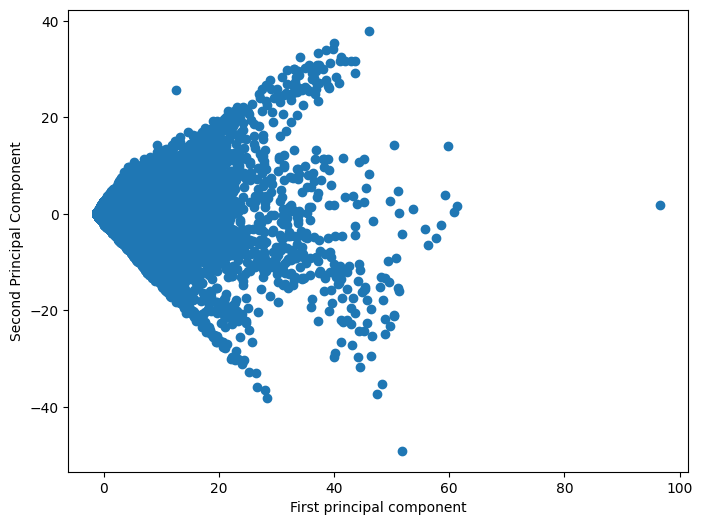

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
# Эта команда требует интернет, а также "зелёный свет" от сетевого экрана (firewall)
cancer_dictionary = load_breast_cancer()

In [7]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer_dictionary['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Создание диаграммы рассеяния (scatter plot) для первых двух главных компонент

Text(0, 0.5, 'Second Principal Component')

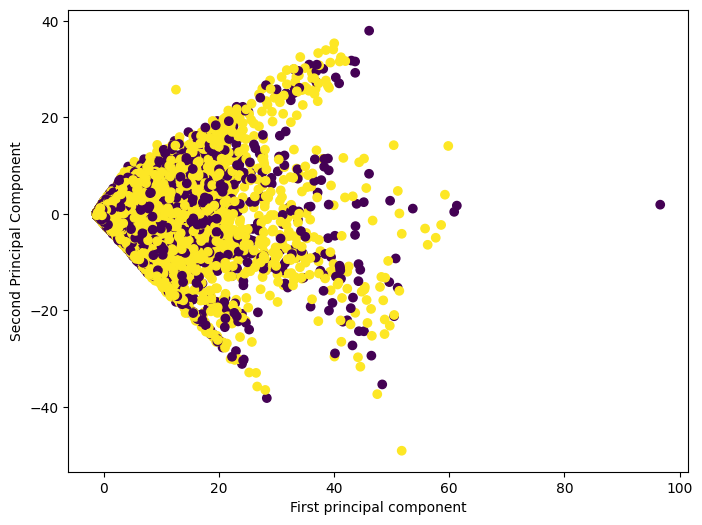

In [32]:
plt.figure(figsize=(8,6))
target_expanded = np.tile(cancer_dictionary['target'], (principal_components.shape[0] // len(cancer_dictionary['target']) + 1))[:principal_components.shape[0]]
plt.scatter(principal_components[:,0], principal_components[:,1], c=target_expanded)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=8)

In [35]:
principal_components = pca.fit_transform(scaled_X)

In [36]:
pca.n_components

8

In [37]:
pca.components_

array([[-0.11458241,  0.03551415,  0.06475644, -0.01126035,  0.17247117,
         0.2581429 ,  0.30035725,  0.32635217,  0.32515453,  0.33396038,
         0.1418135 ,  0.20654901,  0.25417509,  0.27611727,  0.27471466,
         0.2830657 ,  0.33424022],
       [ 0.01155685, -0.04317059,  0.00286346, -0.00581419, -0.33968492,
        -0.31408827, -0.25186054, -0.22293462, -0.19656613, -0.17059582,
         0.15741094,  0.3090254 ,  0.33108054,  0.35267218,  0.34607188,
         0.33259127, -0.13564333],
       [-0.4679935 , -0.21263353,  0.71108724,  0.47044741, -0.0057232 ,
        -0.00830392, -0.03084792, -0.02801174, -0.03860193, -0.044018  ,
        -0.01541251, -0.02564003, -0.03470025, -0.01244752, -0.01580175,
        -0.02391568, -0.02149215],
       [ 0.26494328, -0.4328632 ,  0.04266225,  0.00856916,  0.36072295,
         0.12560503, -0.0287923 , -0.06158315, -0.1175601 , -0.1167177 ,
         0.66713256,  0.26677225,  0.03372944, -0.08852603, -0.14205944,
        -0.13070527

## -------------------------------------------------------------------------------------------------------------------------------

# Компоненты PCA - веса каждого признака для первых двух компонент

In [38]:
df_comp = pd.DataFrame(pca.components_[:2], index=['PC1', 'PC2'], columns=df.columns)

In [39]:
df_comp

,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
PC1,-0.114582,0.035514,0.064756,-0.011260,0.172471,0.258143,0.300357,0.326352,0.325155,0.333960,0.141813,0.206549,0.254175,0.276117,0.274715,0.283066,0.334240
PC2,0.011557,-0.043171,0.002863,-0.005814,-0.339685,-0.314088,-0.251861,-0.222935,-0.196566,-0.170596,0.157411,0.309025,0.331081,0.352672,0.346072,0.332591,-0.135643


## Визуализация весов первых двух компонент для каждого признака с помощью тепловой карты

<Axes: >

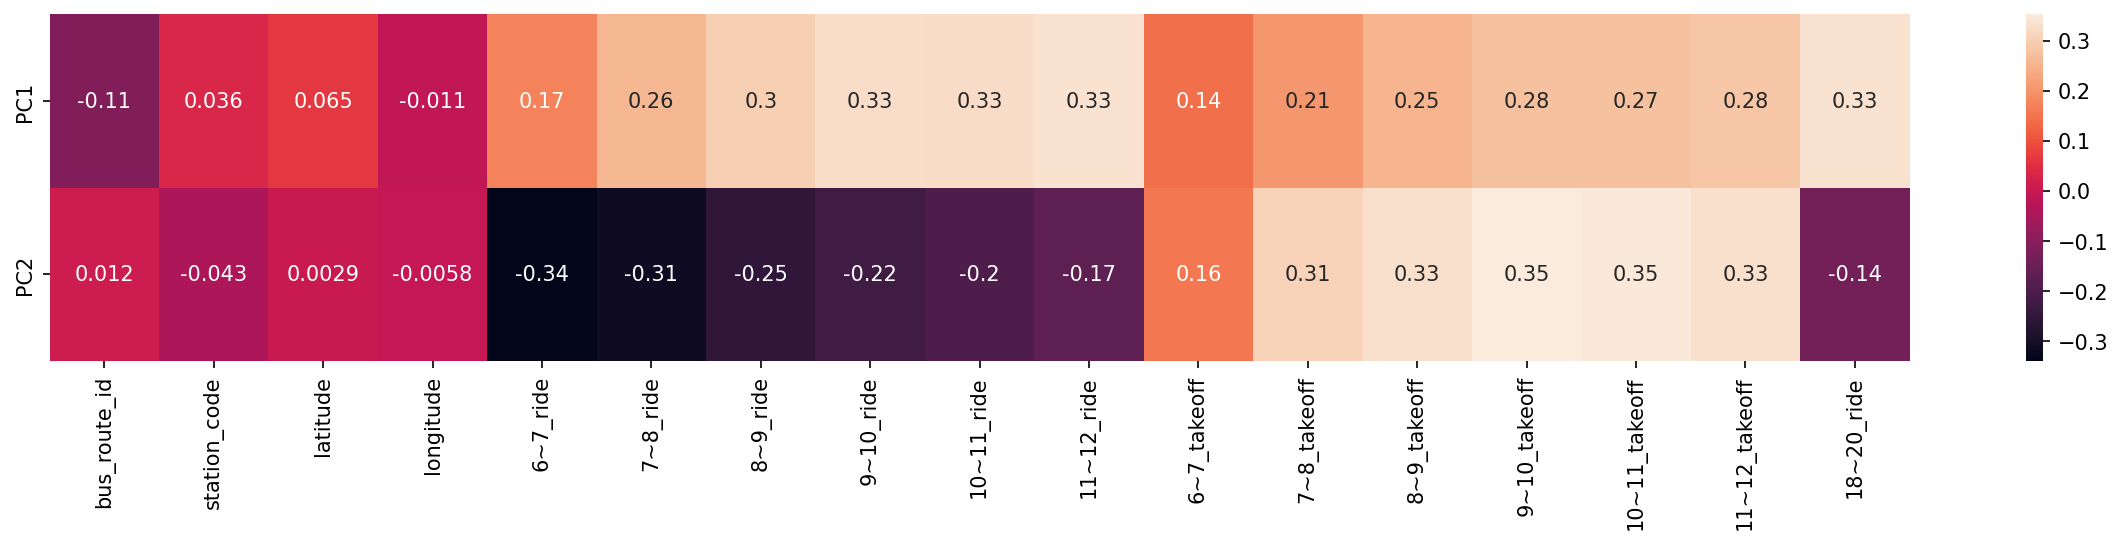

In [40]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True)

## Доля объяснённой дисперсии для первых 8 компонент
## Показывает, сколько информации содержится в каждой компоненте, с суммой в 72.8%

In [41]:
pca.explained_variance_ratio_

array([0.27122212, 0.11647489, 0.07100174, 0.05992206, 0.05848591,
       0.05784293, 0.04972596, 0.04396463])

In [42]:
np.sum(pca.explained_variance_ratio_)

0.7286402357075433

## Повторное выполнение PCA с 16 компонентами для объяснения 98% дисперсии

In [43]:
pca_16 = PCA(n_components=16)
pca_16.fit(scaled_X)

PCA(n_components=16)

In [44]:
pca_16.explained_variance_ratio_

array([0.27122212, 0.11647489, 0.07100174, 0.05992206, 0.05848591,
       0.05784293, 0.04972596, 0.04396463, 0.04220002, 0.03811267,
       0.03483531, 0.03286687, 0.03256271, 0.02672099, 0.02341912,
       0.02079879])

In [45]:
np.sum(pca_16.explained_variance_ratio_)

0.9801567216497653

## Построение графика зависимости объяснённой дисперсии от количества компонент
## Этот график помогает выбрать оптимальное количество компонент для сохранения большей части информации

In [46]:
explained_variance = []

for n in range(1,16):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

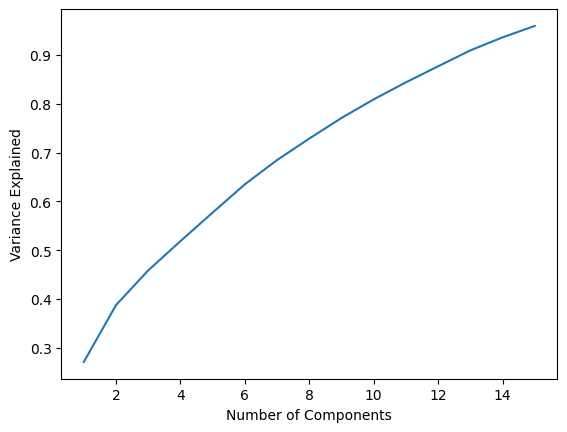

In [47]:
plt.plot(range(1,16),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

## -------------------------------------------------------------------------------------------------------------------------------

## Импорт библиотек
Импортируем необходимые библиотеки для работы с данными, обучения моделей и их оценки.

In [14]:
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

## Подготовка данных
Загружаем тренировочные данные, удаляем ненужные столбцы (id, date, station_name, in_out), и делим данные на признаки (X) и целевую переменную (y) для построения моделей.

In [29]:
df = train.drop(columns=['id', 'date', 'station_name', 'in_out'])

In [19]:
X = df.drop("18~20_ride", axis=1)

In [20]:
y = df["18~20_ride"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## -------------------------------------------------------------------------------------------------------------------------------

# Модель 1: Линейная регрессия
Обучаем простую модель линейной регрессии на тренировочных данных и оцениваем ее качество. Эта модель служит базовым ориентиром для сравнения с более сложными моделями.

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
root_mean_squared_error(y_test, y_pred)

3.371191337572628

In [26]:
r2_score(y_test, y_pred)

0.42880773592122123

## -------------------------------------------------------------------------------------------------------------------------------

# Модель 2: Градиентный бустинг
Обучаем модель GradientBoostingRegressor, которая является мощным ансамблевым методом, последовательно уменьшающим ошибку.

In [60]:
model = GradientBoostingRegressor(random_state=42)

In [61]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [62]:
y_pred = model.predict(X_test)

In [67]:
root_mean_squared_error(y_test, y_pred)

3.068511522567079

In [68]:
r2_score(y_test, y_pred)

0.5267713504665636

## -------------------------------------------------------------------------------------------------------------------------------

# Модель 3: XGBoost Regressor
Обучаем модель XGBRegressor, которая оптимизирована для высокой производительности и позволяет использовать дополнительные параметры для настройки.

In [70]:
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # для регрессии с MSE
    n_estimators=200,              # количество деревьев, больше подходит для стабильности
    max_depth=5,                   # разумная глубина для предотвращения переобучения
    learning_rate=0.1,             # обычная скорость обучения
    subsample=0.8,                 # использование части данных для предотвращения переобучения
    colsample_bytree=0.8,          # использование части признаков для деревьев
    random_state=42
)

In [71]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [73]:
y_pred = xgboost_model.predict(X_test)

In [74]:
root_mean_squared_error(y_test, y_pred)

2.822771796726676

In [75]:
r2_score(y_test, y_pred)

0.5995327075787247

## -------------------------------------------------------------------------------------------------------------------------------

#  Тестирование на новых данных
Загружаем тестовые данные, подготавливаем их аналогично тренировочным и исследуем уникальные значения в столбце (7~8_ride) для анализа распределения целевой переменной.

In [30]:
test = pd.read_csv('test.csv')

In [31]:
df = test.drop(columns=['id', 'date', 'station_name', 'in_out'])
df.head()

,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,4270000,344,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4270000,357,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4270000,432,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4270000,1579,33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4270000,1636,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
df['7~8_ride'].unique()

array([  4.,   6.,  11.,   0.,   1.,   7.,   2.,   5.,   3.,  10.,   8.,
        18.,  17.,  13.,  12.,  15.,  16.,   9.,  24.,  19.,  61.,  40.,
        22.,  14.,  21.,  67.,  30.,  41.,  23.,  38.,  26.,  50.,  44.,
        37.,  27.,  25.,  28.,  32.,  49.,  35.,  20.,  31.,  34.,  59.,
        42.,  66.,  39.,  29.,  48.,  43.,  47.,  53.,  36.,  33.,  51.,
        55.,  72.,  58.,  77.,  45.,  54., 100.])

In [32]:
X = df.drop('7~8_ride', axis=1)

In [33]:
y = df['7~8_ride']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [83]:
y_pred = xgboost_model.predict(X_test)

In [84]:
root_mean_squared_error(y_test, y_pred)

1.5508327893424498

In [85]:
r2_score(y_test, y_pred)

0.42476602524051565

## -------------------------------------------------------------------------------------------------------------------------------

## Модель 4: Случайный лес (Random Forest Regressor)
В качестве следующей модели мы выбрали `RandomForestRegressor`, который строит ансамбль деревьев решений и усредняет их предсказания. Случайный лес эффективен для задач регрессии и часто показывает хорошие результаты на табличных данных.

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr = RandomForestRegressor()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
y_pred = rfr.predict(X_test)

In [38]:
root_mean_squared_error(y_test, y_pred)

1.479617404373819

In [39]:
r2_score(y_test, y_pred)

0.47638335761688155